## Project 1. Pokemon Go

### Dataset explained: The dataset contains information about different pokemon species and their pre-evolution and post-evolution traits such as combat power (cp), hp, different attacks, etc... 
### The post-evolution columns are labeled with "_new" at the end of each column

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
# reading in the excel file with the data
df = pd.read_excel('Pokemon Go.xlsx')
# printing the data out
df

,name,species,cp,hp,weight,height,power_up_stardust,power_up_candy,attack_weak,attack_weak_type,...,height_new,power_up_stardust_new,power_up_candy_new,attack_weak_new,attack_weak_type_new,attack_weak_value_new,attack_strong_new,attack_strong_type_new,attack_strong_value_new,notes
0,Pidgey1,Pidgey,384,56,2.31,0.34,2500,2,Tackle,Normal,...,1.24,2500,2,Steel Wing,Steel,15,Air Cutter,Flying,30,NaN
1,Pidgey2,Pidgey,366,54,1.67,0.29,2500,2,Quick Attack,Normal,...,1.05,2500,2,Wing Attack,Flying,9,Air Cutter,Flying,30,NaN
2,Pidgey3,Pidgey,353,55,1.94,0.30,3000,3,Quick Attack,Normal,...,1.11,3000,3,Wing Attack,Flying,9,Air Cutter,Flying,30,NaN
3,Pidgey4,Pidgey,338,51,1.73,0.31,3000,3,Tackle,Normal,...,1.12,3000,3,Steel Wing,Steel,15,Air Cutter,Flying,30,NaN
4,Pidgey5,Pidgey,242,45,1.44,0.27,1900,2,Quick Attack,Normal,...,0.98,1900,2,Wing Attack,Flying,9,Twister,Dragon,25,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Eevee3,Eevee,500,64,5.11,0.26,2200,2,Tackle,Normal,...,0.77,2200,2,Ember,Fire,10,Fire Blast,Fire,100,"Jolteon, attack details added on date later th..."
71,Eevee7,Eevee,606,74,10.42,0.38,2500,2,Tackle,Normal,...,1.26,2500,2,Water Gun,Water,6,Aqua Tail,Water,45,"Vaporeon, attack details added on date later t..."
72,Eevee8,Eevee,548,66,6.87,0.32,2500,2,Tackle,Normal,...,0.95,2500,2,Ember,Fire,10,Heat Wave,Fire,80,"Flareon, attack details added on date later th..."
73,Eevee9,Eevee,528,66,7.43,0.31,2200,2,Quick Attack,Normal,...,0.82,2200,2,Thunder Shock,Electric,5,Thunderbolt,Electric,55,"Jolteon, attack details added on date later th..."


In [4]:
# printing all the columns in the dataset
df.columns

Index(['name', 'species', 'cp', 'hp', 'weight', 'height', 'power_up_stardust',
       'power_up_candy', 'attack_weak', 'attack_weak_type',
       'attack_weak_value', 'attack_strong', 'attack_strong_type',
       'attack_strong_value', 'cp_new', 'hp_new', 'weight_new', 'height_new',
       'power_up_stardust_new', 'power_up_candy_new', 'attack_weak_new',
       'attack_weak_type_new', 'attack_weak_value_new', 'attack_strong_new',
       'attack_strong_type_new', 'attack_strong_value_new', 'notes'],
      dtype='object')

In [5]:
# checking the data type of all the columns
df.dtypes

name                        object
species                     object
cp                           int64
hp                           int64
weight                     float64
height                     float64
power_up_stardust            int64
power_up_candy               int64
attack_weak                 object
attack_weak_type            object
attack_weak_value            int64
attack_strong               object
attack_strong_type          object
attack_strong_value          int64
cp_new                       int64
hp_new                       int64
weight_new                 float64
height_new                 float64
power_up_stardust_new        int64
power_up_candy_new           int64
attack_weak_new             object
attack_weak_type_new        object
attack_weak_value_new        int64
attack_strong_new           object
attack_strong_type_new      object
attack_strong_value_new      int64
notes                       object
dtype: object

In [6]:
# dropping the notes column since it's not really usefull
df.drop('notes', axis=1, inplace=True)
df

,name,species,cp,hp,weight,height,power_up_stardust,power_up_candy,attack_weak,attack_weak_type,...,weight_new,height_new,power_up_stardust_new,power_up_candy_new,attack_weak_new,attack_weak_type_new,attack_weak_value_new,attack_strong_new,attack_strong_type_new,attack_strong_value_new
0,Pidgey1,Pidgey,384,56,2.31,0.34,2500,2,Tackle,Normal,...,2.60,1.24,2500,2,Steel Wing,Steel,15,Air Cutter,Flying,30
1,Pidgey2,Pidgey,366,54,1.67,0.29,2500,2,Quick Attack,Normal,...,1.93,1.05,2500,2,Wing Attack,Flying,9,Air Cutter,Flying,30
2,Pidgey3,Pidgey,353,55,1.94,0.30,3000,3,Quick Attack,Normal,...,3.51,1.11,3000,3,Wing Attack,Flying,9,Air Cutter,Flying,30
3,Pidgey4,Pidgey,338,51,1.73,0.31,3000,3,Tackle,Normal,...,30.00,1.12,3000,3,Steel Wing,Steel,15,Air Cutter,Flying,30
4,Pidgey5,Pidgey,242,45,1.44,0.27,1900,2,Quick Attack,Normal,...,1.42,0.98,1900,2,Wing Attack,Flying,9,Twister,Dragon,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Eevee3,Eevee,500,64,5.11,0.26,2200,2,Tackle,Normal,...,6.06,0.77,2200,2,Ember,Fire,10,Fire Blast,Fire,100
71,Eevee7,Eevee,606,74,10.42,0.38,2500,2,Tackle,Normal,...,10.55,1.26,2500,2,Water Gun,Water,6,Aqua Tail,Water,45
72,Eevee8,Eevee,548,66,6.87,0.32,2500,2,Tackle,Normal,...,5.63,0.95,2500,2,Ember,Fire,10,Heat Wave,Fire,80
73,Eevee9,Eevee,528,66,7.43,0.31,2200,2,Quick Attack,Normal,...,8.93,0.82,2200,2,Thunder Shock,Electric,5,Thunderbolt,Electric,55


In [7]:
# checking if any of the columns are missing data 
df.isna().any

<bound method NDFrame._add_numeric_operations.<locals>.any of      name  species     cp     hp  weight  height  power_up_stardust  \
0   False    False  False  False   False   False              False   
1   False    False  False  False   False   False              False   
2   False    False  False  False   False   False              False   
3   False    False  False  False   False   False              False   
4   False    False  False  False   False   False              False   
..    ...      ...    ...    ...     ...     ...                ...   
70  False    False  False  False   False   False              False   
71  False    False  False  False   False   False              False   
72  False    False  False  False   False   False              False   
73  False    False  False  False   False   False              False   
74  False    False  False  False   False   False              False   

    power_up_candy  attack_weak  attack_weak_type  ...  weight_new  \
0            Fa

### Descriptive Statistics 

In [8]:
# Post-Evolution hp mean
new_hp_mean = df['hp_new'].mean()
# post evolution hp standard deviation
new_hp_std = df['hp_new'].std()
# post evolution hp median
new_hp_median = df['hp_new'].median()

# post-evolution attack weak value
new_attack_weak_mean = df['attack_weak_value'].mean()
# post evolution attack weak standard deviation
new_attack_weak_std = df['attack_weak_value'].std()
# post evolution attack weak median
new_attack_weak_median = df['attack_weak_value'].median()


In [9]:
# Printing the statistics of post evolution HP
print('Post Evolution HP')
print('Mean:', new_hp_mean)
print('Standard Deviation:', new_hp_std)
print('Median:', new_hp_median)

Post Evolution HP
Mean: 56.38666666666666
Standard Deviation: 26.122835269597413
Median: 54.0


In [10]:
print('Post Evolution Attack Weak Value')
print('Mean:', new_attack_weak_mean)
print('Standard Deviation:', new_attack_weak_std)
print('Median:', new_attack_weak_median)

Post Evolution Attack Weak Value
Mean: 9.293333333333333
Standard Deviation: 2.898151010433941
Median: 10.0


### Relationships between variables

#### Average pre-evolution combat power (CP) vs Average post-evolution combat power (CP) of different species 

In [11]:
# creating a new table with each species and it's average pre-CP. Grouped by species
pre_cp = df[['species','cp']].groupby('species').mean().reset_index()
pre_cp

,species,cp
0,Caterpie,131.700000
1,Eevee,553.000000
2,Pidgey,194.717949
3,Weedle,127.950000


In [12]:
# creating a new table with each species and it's average post-CP
post_cp = df[['species','cp_new']].groupby('species').mean().reset_index()
post_cp

,species,cp_new
0,Caterpie,142.100000
1,Eevee,1375.166667
2,Pidgey,366.307692
3,Weedle,139.100000


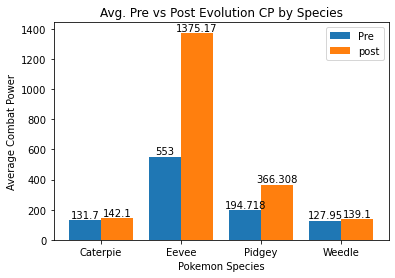

In [13]:
# creating a bar graph which shows the difference in mean between the species
# x variable is the x axis for the the graphs
x = np.arange(len(pre_cp['species']))
width = 0.4
# creating a subplot because I want two bar graphs to be in 1 graph
fig, ax = plt.subplots()
# plt1 is the graph for average pre-evolution pokemon species
plt1 = ax.bar(x - width/2,pre_cp['cp'],width, label = 'Pre')
# plt2 is the graph for average post-evolution pokemon species
plt2 = ax.bar(x + width/2,post_cp['cp_new'],width, label = "post")

# creating the labels, legend, and titles for the graph
ax.set_ylabel('Average Combat Power')
ax.set_xlabel('Pokemon Species')
ax.set_title('Avg. Pre vs Post Evolution CP by Species')
ax.set_xticks(x)
ax.set_xticklabels(pre_cp['species'])
ax.legend()
# showing the actual values for each species
ax.bar_label(plt1)
ax.bar_label(plt2)
plt.show()

####  Most common type of strong attack in pre-evolution pokemon vs post-evolution pokemon

In [14]:
# counting how many times each attack strong is in the column and creating a dataframe with it
pre_strong = pd.DataFrame(df['attack_strong'].value_counts()).reset_index()
# renaming the columns
post_strong = pd.DataFrame(df['attack_strong_new'].value_counts()).reset_index()
post_strong.rename(columns={'index':'attack_strong','attack_strong_new':'Frequency'},inplace = True)
pre_strong.rename(columns={'index':'attack_strong','attack_strong':'Frequency'}, inplace = True)
pre_strong

,attack_strong,Frequency
0,Struggle,30
1,Twister,15
2,Air Cutter,13
3,Aerial Ace,11
4,Body Slam,3
5,Dig,2
6,Swift,1


In [15]:
post_strong

,attack_strong,Frequency
0,Struggle,30
1,Aerial Ace,16
2,Air Cutter,13
3,Twister,10
4,Aqua Tail,2
5,Heat Wave,2
6,Fire Blast,1
7,Thunderbolt,1


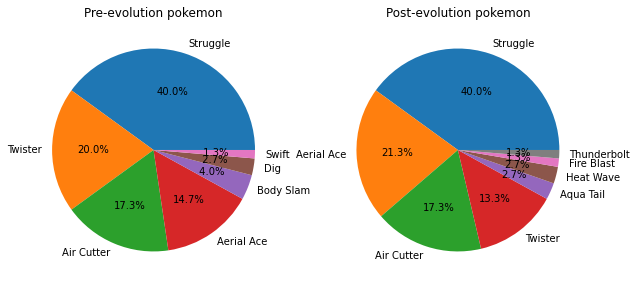

In [16]:
# creating a x and y label for the pie chart
pie_x = pre_strong['attack_strong']
pie_y = pre_strong['Frequency']
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
ax1.pie(pie_y, labels = pie_x,autopct = "%4.1f%%")
ax1.set_title('Pre-evolution pokemon')

# post evolution pie chart creation
pie_x_new = post_strong['attack_strong']
pie_y_new = post_strong['Frequency']
ax2.pie(pie_y_new, labels = pie_x_new,autopct = "%1.1f%%")
# title of the pie chart
ax2.set_title('Post-evolution pokemon')
plt.show()

#### Histogram of pre-evolution and post-evolution pokemon weight

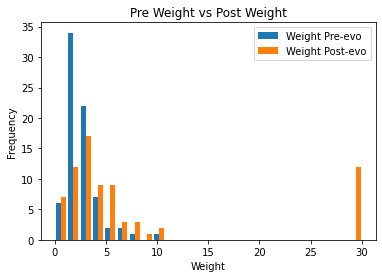

In [17]:
# Taking only the columns of weight thats needed for the histogram
weight_pre = df['weight']
weight_post = df['weight_new']
# plotting the data and making a histogram
plt.hist([weight_pre,weight_post],label = ['Weight Pre-evo','Weight Post-evo'],bins = 25)

#printing the histogram
plt.legend(fontsize = 10)
plt.title('Pre Weight vs Post Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

### ANOVA

#### One Way ANOVA: Checking whether all post-evolution stronger attack type have the same damage value regardless of the type

#### Ho: All of the post evolution stronger attack types have the same damage value [H1=H2=H3=H4=H5=H6] (Flying = Dragon = Normal = Water = Fire = Electric)

#### Ha:  All of the post evolution stronger attack types do not have the same damage value [H1=/ H2 =/ H3 =/ H4 =/ H5 =/ H6]
##### Alpha = 5%

In [18]:
# Checking how many unique strong attack types there are
df['attack_strong_type_new'].unique()

array(['Flying', 'Dragon', 'Normal', 'Water', 'Fire', 'Electric'],
      dtype=object)

In [19]:
# making a table with only the strong attack type and the value
anova_df = df[['attack_strong_type_new','attack_strong_value_new']]
anova_df

,attack_strong_type_new,attack_strong_value_new
0,Flying,30
1,Flying,30
2,Flying,30
3,Flying,30
4,Dragon,25
...,...,...
70,Fire,100
71,Water,45
72,Fire,80
73,Electric,55


In [20]:
# creating seperate variables to pass into the anova function to get the p value
flying = anova_df[anova_df['attack_strong_type_new'] == 'Flying']['attack_strong_value_new']
dragon = anova_df[anova_df['attack_strong_type_new'] == 'Dragon']['attack_strong_value_new']
normal = anova_df[anova_df['attack_strong_type_new'] == 'Normal']['attack_strong_value_new']
water = anova_df[anova_df['attack_strong_type_new'] == 'Water']['attack_strong_value_new']
fire = anova_df[anova_df['attack_strong_type_new'] == 'Fire']['attack_strong_value_new']
electric = anova_df[anova_df['attack_strong_type_new'] == 'Electric']['attack_strong_value_new']

In [21]:
# finding the p value 
stats.f_oneway(flying,dragon,normal,water,fire)

F_onewayResult(statistic=1026.4041385135015, pvalue=1.1809103915259669e-60)

### 3 way hypothesis testing
#### 3 independent variables and 1 dependent variable
#### 3 independent variables: Species, weaker attack type, stronger attack type
#### 1 dependent vairable: CP


#### H0: The post evolution species has no impact on the post evolution CP
#### H0: The post evolution weaker attack type has no impact on the post evolution CP
#### H0: The post evolution stronger attack type has no impact on the post evolution CP
#### H0: The post evolution species, weaker attack type, and stronger attack type has no impact on the post evo CP
#### Ha: The post evolution species has an impact on the post evolution CP
#### Ha: The post evolution weaker attack type has an impact on the post evolution CP
#### Ha: The post evolution stronger attack type has an impact on the post evo CP
#### Ha: The post evolution species, weaker attack type, & stronger attack type has an impact on the post evo CP
###### alpha: 0.05

In [34]:
# getting only the columns of independent and dependent variables
two_way = df[['species','attack_weak_type_new','attack_strong_type_new','cp_new']]
two_way

,species,attack_weak_type_new,attack_strong_type_new,cp_new
0,Pidgey,Steel,Flying,694
1,Pidgey,Flying,Flying,669
2,Pidgey,Flying,Flying,659
3,Pidgey,Steel,Flying,640
4,Pidgey,Flying,Dragon,457
...,...,...,...,...
70,Eevee,Fire,Fire,1253
71,Eevee,Water,Water,1591
72,Eevee,Fire,Fire,1362
73,Eevee,Electric,Electric,1059


In [23]:
# anova function, the dependent variable CP is in the left side of ~
anova_2 = ols('cp_new ~ species+attack_weak_type_new+attack_strong_type_new', data = two_way).fit()
chart = sm.stats.anova_lm(anova_2, type = 2)

In [35]:
# printing the chart with the p value and data
chart

,df,sum_sq,mean_sq,F,PR(>F)
species,3,7634771,2544924,90,0
attack_weak_type_new,7,320292,45756,2,0
attack_strong_type_new,5,44097,8819,0,1
Residual,65,1840878,28321,NaN,NaN


### Multiple Regression
#### Using weight, power up candy, and power up stardust to predict the CP of post evolution species

In [32]:
# getting the weight, stardust, and candy in the x variable
regre_x = df[['weight_new','power_up_stardust_new','power_up_candy_new']]
# since we are predicting the combat power, it will be in the y
regre_y = df['cp_new']

In [26]:
# splitting the data into train and test, with 25% of the data to be used for test set
x_train,x_test,y_train,y_test = train_test_split(regre_x,regre_y,test_size = 0.25,random_state = 0)

lr = LinearRegression()
# fitting the x and y training sets to the function
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
# finding coeficient
coe = lr.coef_
# finding the intercept
inter = lr.intercept_
# There are 3 coeficients because there are 3 inputs, weight, power up startdust, and power up candy
print("The coeficients are:",coe)
print("The intercepts are:",inter)

The coeficients are: [   3.57899244    0.35511825 -183.12885896]
The intercepts are: 59.748094273685126


In [28]:
# prediction of test set 
multi_pred = lr.predict(x_test)
multi_pred

# making a chart of actual value, and predicted value to see the difference
comparison_df = pd.DataFrame({'Actual':y_test,"Predicted":multi_pred})
# getting rid of the scientific notation to make the table more clear
pd.options.display.float_format = '{:.0f}'.format
# displaying it 
comparison_df

,Actual,Predicted
52,115,174
57,86,167
22,241,173
74,1340,609
28,594,602
26,393,369
66,161,375
54,18,-41
34,418,288
7,47,-43


Text(0.5, 1.0, 'Multiple Regression')

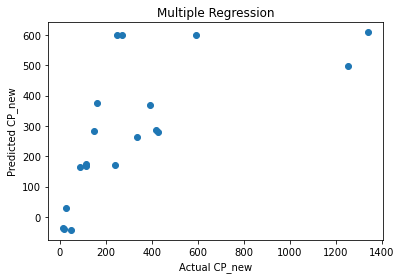

In [31]:
# plotting the actual  vs predicted graph
plt.scatter(y_test,multi_pred)
plt.xlabel("Actual CP_new")
plt.ylabel("Predicted CP_new")
plt.title('Multiple Regression')

In [36]:
# printing the goddness of fit
r2_score(y_test,multi_pred)

0.42287808098282287

#### Sources:
    https://www.youtube.com/watch?v=l_5ROrvVCEc
    https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
    https://stackoverflow.com/questions/58887571/plotting-2-pie-charts-side-by-side-in-matplotlib
    https://www.youtube.com/watch?v=pkSAA0dCBP4
    https://www.youtube.com/watch?v=wH_ezgftiy0
     https://realpython.com/train-test-split-python-data/#:~:text=Using%20train_test_split()